In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
import keras,os
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from tensorflow.keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
train_dir = "/home/dai/Downloads/Brain Tumor Images Dataset/training_set"
validation_dir = "/home/dai/Downloads/Brain Tumor Images Dataset/validation_set"


train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     

validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))



Found 140 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


# model

In [3]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    
 
    tf.keras.layers.Flatten(), 

    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.1, seed=2019),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dropout(0.2, seed=2019),
  
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 16)        2

In [5]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [6]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=10,
                              epochs=10,
                              validation_steps=20,
                              verbose=1)

Epoch 1/10
10/10 [==============================] - 7s 701ms/step - loss: 0.6787 - accuracy: 0.5600 - val_loss: 1.0462 - val_accuracy: 0.5000
Epoch 2/10
10/10 [==============================] - 5s 517ms/step - loss: 0.6552 - accuracy: 0.7100 - val_loss: 0.9836 - val_accuracy: 0.5000
Epoch 3/10
10/10 [==============================] - 5s 529ms/step - loss: 0.5915 - accuracy: 0.6750 - val_loss: 0.6549 - val_accuracy: 0.5500
Epoch 4/10
10/10 [==============================] - 5s 522ms/step - loss: 0.4279 - accuracy: 0.8050 - val_loss: 0.7502 - val_accuracy: 0.5250
Epoch 5/10
10/10 [==============================] - 5s 539ms/step - loss: 0.5232 - accuracy: 0.7550 - val_loss: 0.6223 - val_accuracy: 0.6000
Epoch 6/10
10/10 [==============================] - 5s 512ms/step - loss: 0.3656 - accuracy: 0.8150 - val_loss: 0.6956 - val_accuracy: 0.7000
Epoch 7/10
10/10 [==============================] - 5s 533ms/step - loss: 0.2971 - accuracy: 0.8950 - val_loss: 0.6959 - val_accuracy: 0.7500
Epoch 

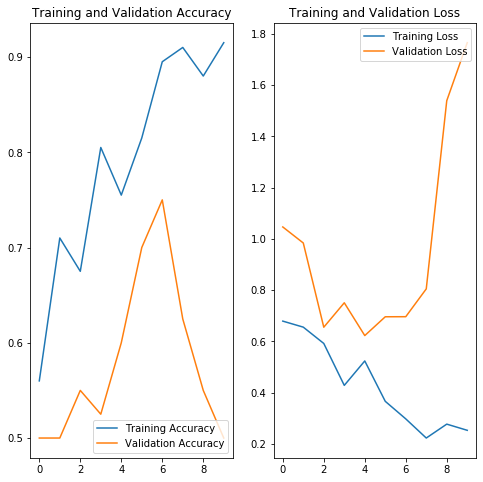

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [8]:
model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [9]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=10,
                              epochs=10,
                              validation_steps=20,
                              verbose=1)

Epoch 1/10
10/10 [==============================] - 5s 544ms/step - loss: 0.1500 - accuracy: 0.9350 - val_loss: 0.9603 - val_accuracy: 0.6000
Epoch 2/10
10/10 [==============================] - 5s 504ms/step - loss: 0.0756 - accuracy: 0.9800 - val_loss: 1.4643 - val_accuracy: 0.5500
Epoch 3/10
10/10 [==============================] - 5s 521ms/step - loss: 0.0246 - accuracy: 0.9950 - val_loss: 1.9750 - val_accuracy: 0.4750
Epoch 4/10
10/10 [==============================] - 5s 496ms/step - loss: 0.0259 - accuracy: 0.9950 - val_loss: 2.3880 - val_accuracy: 0.4750
Epoch 5/10
10/10 [==============================] - 5s 514ms/step - loss: 0.0114 - accuracy: 1.0000 - val_loss: 2.0970 - val_accuracy: 0.5250
Epoch 6/10
10/10 [==============================] - 5s 508ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.6845 - val_accuracy: 0.6750
Epoch 7/10
10/10 [==============================] - 5s 515ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 2.2782 - val_accuracy: 0.5750
Epoch 

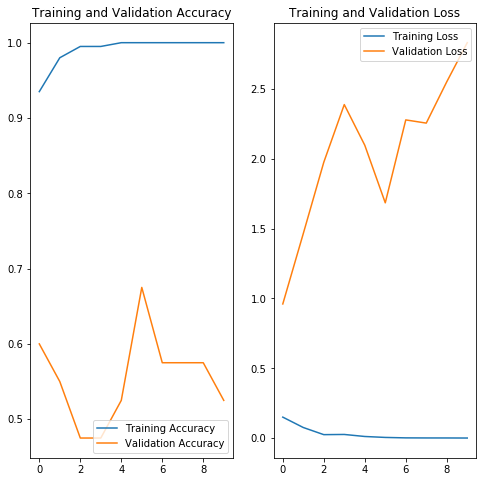

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# make the H5 file

In [11]:
import tensorflow as tf
from tensorflow import keras
import h5py

model.save('modelbrain.h5')
loaded_model = keras.models.load_model('modelbrain.h5')

# prediction

In [12]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

loaded_model = keras.models.load_model('modelbrain.h5')

model.compile(loss='binary_crossentropy',

              optimizer='rmsprop',

              metrics=['accuracy'])

img = cv2.imread('/home/dai/Downloads/my project/Brain Tumor Images Dataset-20200103T163459Z-001/Brain Tumor Images Dataset/test_set/non_hemmorhage_data/100.png')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])
img = tf.cast(img, tf.float32)
classes = model.predict_classes(img)
print(classes)
i = 1

for things in classes:  
    if(things == 0):
        print('%d.It is cancer'%(i))
    else:
        print('%d.Not cancer'%(i))
    i = i + 1


[[1]]
1.Not cancer


In [13]:
loaded_model = keras.models.load_model('modelbrain.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',

              metrics=['accuracy'])

img = cv2.imread('/home/dai/Downloads/my project/Brain Tumor Images Dataset-20200103T163459Z-001/Brain Tumor Images Dataset/test_set/non_hemmorhage_data/126.png')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])
img = tf.cast(img, tf.float32)
classes = model.predict_classes(img)
print(classes)
i = 1

for things in classes:  
    if(things == 0):
        print('%d.It is cancer'%(i))
    else:
        print('%d.Not cancer'%(i))
    i = i + 1

[[1]]
1.Not cancer


In [14]:
loaded_model = keras.models.load_model('modelbrain.h5')
model.compile(loss='binary_crossentropy',

              optimizer='rmsprop',

              metrics=['accuracy'])

img = cv2.imread('/home/dai/Downloads/my project/Brain Tumor Images Dataset-20200103T163459Z-001/Brain Tumor Images Dataset/test_set/non_hemmorhage_data/127.png')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])
img = tf.cast(img, tf.float32)
classes = model.predict_classes(img)
print(classes)
i = 1

for things in classes:  
    if(things == 0):
        print('%d.It is cancer'%(i))
    else:
        print('%d.Not cancer'%(i))
    i = i + 1


[[1]]
1.Not cancer


In [15]:
loaded_model = keras.models.load_model('modelbrain.h5')
model.compile(loss='binary_crossentropy',

              optimizer='rmsprop',

              metrics=['accuracy'])

img = cv2.imread('/home/dai/Downloads/my project/Brain Tumor Images Dataset-20200103T163459Z-001/Brain Tumor Images Dataset/test_set/hemmorhage_data/000.png')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])
img = tf.cast(img, tf.float32)
classes = model.predict_classes(img)
print(classes)
i = 1

for things in classes:  
    if(things == 0):
        print('%d.It is cancer'%(i))
    else:
        print('%d.Not cancer'%(i))
    i = i + 1

[[0]]
1.It is cancer


In [16]:
loaded_model = keras.models.load_model('modelbrain.h5')
model.compile(loss='binary_crossentropy',

              optimizer='rmsprop',

              metrics=['accuracy'])

img = cv2.imread('/home/dai/Downloads/my project/Brain Tumor Images Dataset-20200103T163459Z-001/Brain Tumor Images Dataset/test_set/hemmorhage_data/001.png')
img = cv2.resize(img,(150,150))
img = np.reshape(img,[1,150,150,3])
img = tf.cast(img, tf.float32)
classes = model.predict_classes(img)
print(classes)
i = 1

for things in classes:  
    if(things == 0):
        print('%d.It is cancer'%(i))
    else:
        print('%d.Not cancer'%(i))
    i = i + 1

[[0]]
1.It is cancer


# Image Segmentation

# Image Segmentation based on Clustering

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image = cv2.imread('/home/dai/Downloads/my project/Brain Tumor Images Dataset-20200103T163459Z-001/Brain Tumor Images Dataset/test_set/hemmorhage_data/001.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

pixel_values = image.reshape((-1, 3))

pixel_values = np.float32(pixel_values)

print(pixel_values.shape)

(477696, 3)


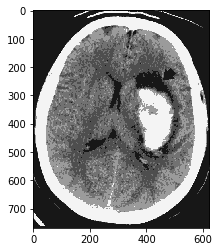

In [9]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# number of clusters (K)
k = 5
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

segmented_image = centers[labels.flatten()]

# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

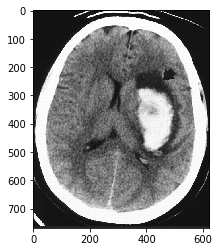

In [6]:
plt.imshow(image)
plt.show()

# Region-based Segmentation

In [15]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

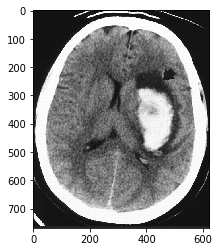

In [16]:
image = plt.imread('/home/dai/Downloads/my project/Brain Tumor Images Dataset-20200103T163459Z-001/Brain Tumor Images Dataset/test_set/hemmorhage_data/001.png')
image.shape
plt.imshow(image)

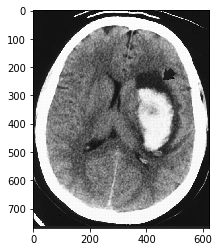

In [17]:
gray = rgb2gray(image)
plt.imshow(gray, cmap='gray')

In [18]:
gray.shape

(768, 622)

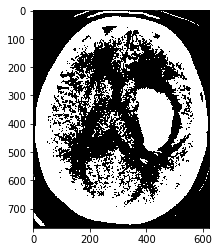

In [19]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

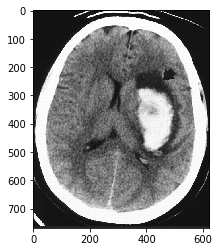

In [20]:
image = plt.imread('/home/dai/Downloads/my project/Brain Tumor Images Dataset-20200103T163459Z-001/Brain Tumor Images Dataset/test_set/hemmorhage_data/001.png')
image.shape
plt.imshow(image)

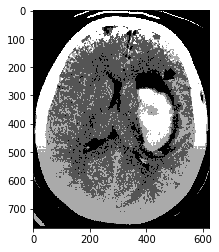

In [21]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

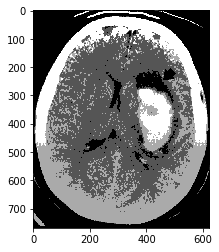

In [22]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.20:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

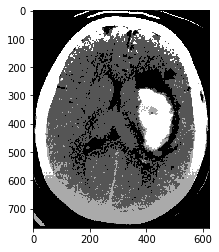

In [23]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.60:
        gray_r[i] = 2
    elif gray_r[i] > 0.30:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.imshow(gray, cmap='gray')

# Edge Detection Segmentation

In [24]:
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, 'is a kernel for detecting horizontal edges')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, 'is a kernel for detecting vertical edges')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] is a kernel for detecting horizontal edges
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] is a kernel for detecting vertical edges


In [25]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')

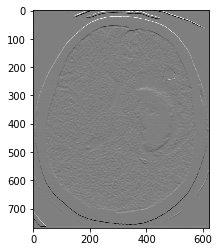

In [26]:
plt.imshow(out_h, cmap='gray')

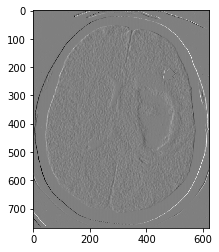

In [27]:
plt.imshow(out_v, cmap='gray')

In [28]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, 'is a laplacian kernel')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] is a laplacian kernel


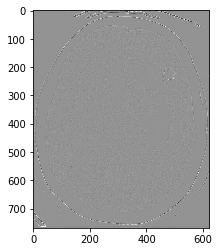

In [29]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')